In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') 

In [9]:
columns =['user_id','order_dt','order_products','order_amount']
df = pd.read_table('./data/CDNOW_master.txt',names = columns,sep='\s+')
df.head()

user_id  order_dt  order_products  order_amount
0        1  19970101               1         11.77
1        2  19970112               1         12.00
2        2  19970112               5         77.00
3        3  19970102               2         20.76
4        3  19970330               2         20.76

In [10]:
df.describe()

user_id      order_dt  order_products  order_amount
count  69659.000000  6.965900e+04    69659.000000  69659.000000
mean   11470.854592  1.997228e+07        2.410040     35.893648
std     6819.904848  3.837735e+03        2.333924     36.281942
min        1.000000  1.997010e+07        1.000000      0.000000
25%     5506.000000  1.997022e+07        1.000000     14.490000
50%    11410.000000  1.997042e+07        2.000000     25.980000
75%    17273.000000  1.997111e+07        3.000000     43.700000
max    23570.000000  1.998063e+07       99.000000   1286.010000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [18]:
#data pre-processing
df['order_date'] = pd.to_datetime(df['order_dt'],format = '%Y%m%d')
#tranform the date format
df['month'] = df['order_date'].astype('datetime64[M]')
#change the accuracny


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


Text(0.5, 1.0, 'Ordering times in Each Month')

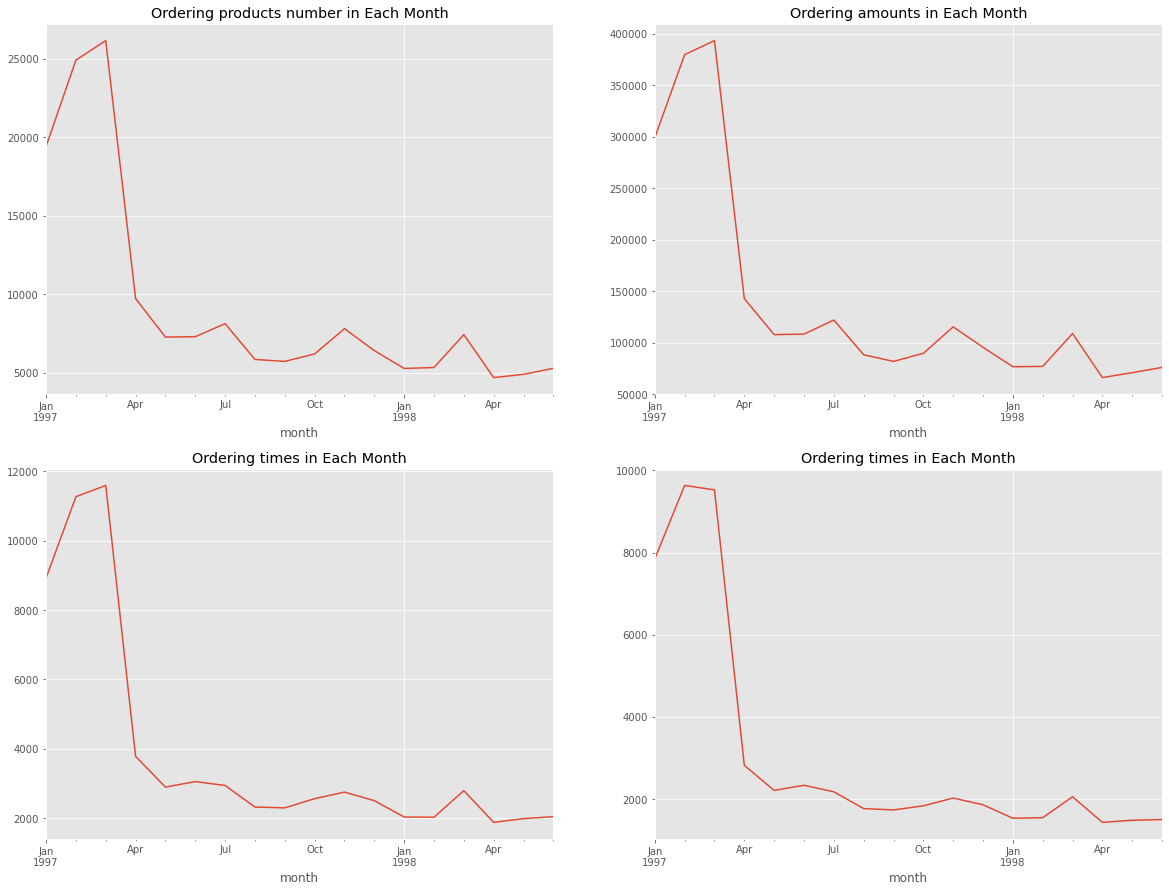

In [29]:
#analyse by month
plt.figure(figsize =(20,15))
plt.subplot(221)
df.groupby(by = 'month')['order_products'].sum().plot()
plt.title('Ordering products number in Each Month')


plt.subplot(222)
df.groupby(by = 'month')['order_amount'].sum().plot()
plt.title('Ordering amounts in Each Month')


plt.subplot(223)
df.groupby(by = 'month')['user_id'].count().plot()
plt.title('Ordering times in Each Month')


plt.subplot(224)
df.groupby(by = 'month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('Ordering People numbers in Each Month')



In [30]:
#Individual Analyse
user_grouped = df.groupby(by = 'user_id').sum()
print(user_grouped.describe())


           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

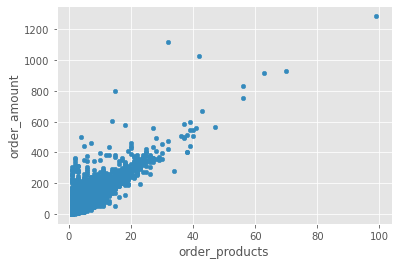

In [31]:
#each customer order amount
df.plot(kind = 'scatter',x = 'order_products',y='order_amount')

<AxesSubplot:xlabel='Each UID Order Amounts', ylabel='Frequency'>

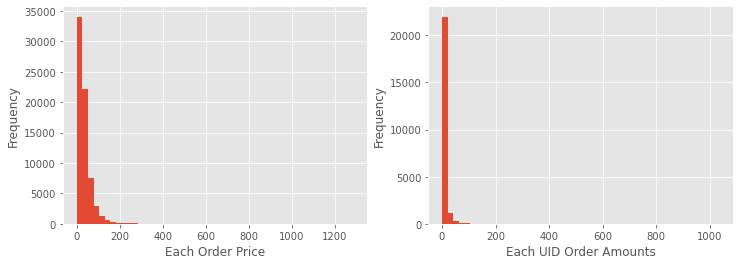

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('Each Order Price')
df['order_amount'].plot(kind = 'hist',bins = 50)


plt.subplot(122)
plt.xlabel('Each UID Order Amounts')
df.groupby(by = 'user_id')['order_products'].sum().plot(kind ='hist',bins = 50)

In [44]:
#find out each id's order amount
user_cumsum = df.groupby(by = 'user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

user_id  order_amount
0        10175          0.00
1         4559          0.00
2         1948          0.00
3          925          0.00
4        10798          0.00
...        ...           ...
23565     7931       6497.18
23566    19339       6552.70
23567     7983       6973.07
23568    14048       8976.33
23569     7592      13990.93

[23570 rows x 2 columns]

In [46]:
#each consumer accmulation
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum.tail()

user_id  order_amount  amount_cumsum
23565     7931       6497.18     2463822.60
23566    19339       6552.70     2470375.30
23567     7983       6973.07     2477348.37
23568    14048       8976.33     2486324.70
23569     7592      13990.93     2500315.63

In [51]:
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis = 1)
#another way to calculate
user_cumsum['n_prop'] = user_cumsum['amount_cumsum']/amount_total
user_cumsum

user_id  order_amount  amount_cumsum      prop    n_prop
0        10175          0.00           0.00  0.000000  0.000000
1         4559          0.00           0.00  0.000000  0.000000
2         1948          0.00           0.00  0.000000  0.000000
3          925          0.00           0.00  0.000000  0.000000
4        10798          0.00           0.00  0.000000  0.000000
...        ...           ...            ...       ...       ...
23565     7931       6497.18     2463822.60  0.985405  0.985405
23566    19339       6552.70     2470375.30  0.988025  0.988025
23567     7983       6973.07     2477348.37  0.990814  0.990814
23568    14048       8976.33     2486324.70  0.994404  0.994404
23569     7592      13990.93     2500315.63  1.000000  1.000000

[23570 rows x 5 columns]

<AxesSubplot:>

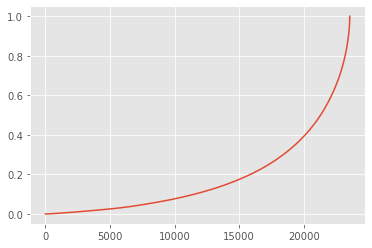

In [52]:
user_cumsum['prop'].plot()

<AxesSubplot:>

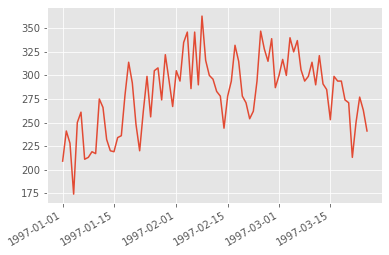

In [55]:
#analyse consumer behavior
#First Time ordering Date
df.groupby(by = 'user_id')['order_date'].min().value_counts().plot()

<AxesSubplot:>

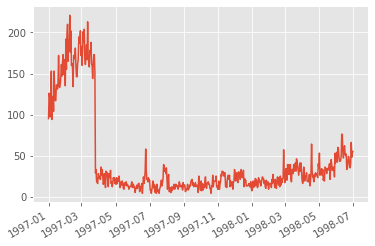

In [56]:
#last date ordering
df.groupby(by = 'user_id')['order_date'].max().value_counts().plot()
#tracking the consumer behavior

RFM Model
R Recency   Last Day Order
F Frequency
M Monetary


In [58]:
#Build RFM MOdel
rfm = df.pivot_table(index = 'user_id',
                    values =['order_products','order_amount','order_date'],
                     aggfunc ={'order_date':'max',#last time order
                              'order_products':'sum',
                               'order_amount':'sum'
                              }
                    )
rfm.head()

order_amount order_date  order_products
user_id                                         
1               11.77 1997-01-01               1
2               89.00 1997-01-12               6
3              156.46 1998-05-28              16
4              100.50 1997-12-12               7
5              385.61 1998-01-03              29

In [65]:
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace = True) 
rfm.head()

M order_date   F      R
user_id                              
1         11.77 1997-01-01   1  545.0
2         89.00 1997-01-12   6  534.0
3        156.46 1998-05-28  16   33.0
4        100.50 1997-12-12   7  200.0
5        385.61 1998-01-03  29  178.0